# Public School Data Analysis: Automated Report Generation

This notebook demonstrates the process of generating a comprehensive HTML report for California public school data, similar to the workflow in `DMProject.py`. It covers data loading, cleaning, merging, correlation analysis, and visualization export for reporting.

In [44]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [45]:
# Ensure output directory exists for saving visualizations and reports
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

In [46]:
# Load and preprocess data (mirroring DMProject.py logic)
# Set working directory if needed (optional, for consistent file paths)
try:
    os.chdir('../data/GroupMining')
except:
    pass

# Load data files
# Expenditure and Salary have footers, so skip them
expend = pd.read_csv('../data/Expenditure_Data.txt', skipfooter=5, engine='python')
salary = pd.read_csv('../data/Salary_Data.txt', skipfooter=5, engine='python')
chronic = pd.read_csv('../data/Chronic_Absent.txt', sep='|')
test_scores = pd.read_csv('../data/Test_Score_Results.txt', sep='\t')
sed = pd.read_csv('../data/Subgroup_Data.txt', usecols=['CDSCODE', 'PERSD'])

# Standardize column names
for df in [expend, salary, chronic, test_scores]:
    df.columns = df.columns.str.upper()

# Data reduction: keep only relevant columns
expend.drop(['SARCYEAR', 'C', 'D', 'S', 'STEXP'], axis=1, inplace=True)
salary = salary[['CDSCODE', 'BTCHSAL', 'MTCHSAL', 'HTCHSAL']]
test_scores = test_scores[['CDSCODE', 'SELA_Y2', 'SMATH_Y2', 'DELA_Y2', 'DMATH_Y2']]
chronic = chronic[['CDSCODE', 'RALL', 'REL', 'RSED']]

# Handle missing values and type conversions
# Replace '--' and '0' with NaN in test scores
for col in ['SELA_Y2', 'SMATH_Y2', 'DELA_Y2', 'DMATH_Y2']:
    test_scores[col] = pd.to_numeric(test_scores[col].replace(['--', '0'], np.nan), errors='coerce')

sed['PERSD'] = pd.to_numeric(sed['PERSD'], errors='coerce').fillna(0)
expend.fillna(expend.mean(numeric_only=True), inplace=True)
salary.fillna(salary.mean(numeric_only=True), inplace=True)
for col in ['BTCHSAL', 'MTCHSAL', 'HTCHSAL']:
    salary[col] = pd.to_numeric(salary[col], errors='coerce')
for col in ['RALL', 'REL', 'RSED']:
    chronic[col] = pd.to_numeric(chronic[col], errors='coerce')
for col in ['DSAL', 'STSAL']:
    expend[col] = pd.to_numeric(expend[col], errors='coerce')

# Merge all dataframes on CDSCODE
merged = expend.merge(salary).merge(test_scores).merge(sed).merge(chronic)
merged.dropna(inplace=True)

# Normalize selected columns
scaler = MinMaxScaler()
columns_to_normalize = ['DSAL', 'STSAL', 'BTCHSAL', 'MTCHSAL', 'HTCHSAL']
merged[columns_to_normalize] = scaler.fit_transform(merged[columns_to_normalize])

# Show data types for verification
print("Data types in merged dataframe:")
print(merged.dtypes)

Data types in merged dataframe:
CDSCODE       int64
DSAL        float64
STSAL       float64
BTCHSAL     float64
MTCHSAL     float64
HTCHSAL     float64
SELA_Y2     float64
SMATH_Y2    float64
DELA_Y2     float64
DMATH_Y2    float64
PERSD       float64
RALL        float64
REL         float64
RSED        float64
dtype: object


/var/folders/cs/mbg5m8mj0yd9wcyv9js3gqh40000gn/T/ipykernel_27617/1125978392.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_scores[col] = pd.to_numeric(test_scores[col].replace(['--', '0'], np.nan), errors='coerce')


## Correlation Matrix and Visualization

Display and visualize the correlation matrix for all variables in the merged dataset.

,CDSCODE,DSAL,STSAL,BTCHSAL,MTCHSAL,HTCHSAL,SELA_Y2,SMATH_Y2,DELA_Y2,DMATH_Y2,PERSD,RALL,REL,RSED
CDSCODE,1.000000,0.060347,-0.011851,0.074795,0.072118,0.104121,-0.006569,-0.002964,-0.001371,0.006472,-0.092118,-0.085225,-0.065527,-0.071833
DSAL,0.060347,1.000000,0.441055,0.701304,0.851891,0.883870,0.227519,0.227829,0.346227,0.315944,-0.133706,-0.122949,-0.062061,-0.101155
STSAL,-0.011851,0.441055,1.000000,0.227977,0.375399,0.402506,0.052524,0.013928,0.109177,0.031111,0.066847,0.014206,0.052986,0.004814
BTCHSAL,0.074795,0.701304,0.227977,1.000000,0.746493,0.715848,0.128169,0.134222,0.200029,0.187547,-0.111207,-0.079468,-0.036705,-0.057102
MTCHSAL,0.072118,0.851891,0.375399,0.746493,1.000000,0.829067,0.179878,0.183472,0.273260,0.254281,-0.113218,-0.116085,-0.059290,-0.097690
HTCHSAL,0.104121,0.883870,0.402506,0.715848,0.829067,1.000000,0.179836,0.177785,0.283604,0.254177,-0.132121,-0.117623,-0.073263,-0.097714
SELA_Y2,-0.006569,0.227519,0.052524,0.128169,0.179878,0.179836,1.000000,0.863551,0.677975,0.645313,-0.756458,-0.617947,-0.386212,-0.475712
SMATH_Y2,-0.002964,0.227829,0.013928,0.134222,0.183472,0.177785,0.863551,1.000000,0.668850,0.711119,-0.764334,-0.590279,-0.412761,-0.435061
DELA_Y2,-0.001371,0.346227,0.109177,0.200029,0.273260,0.283604,0.677975,0.668850,1.000000,0.948619,-0.649101,-0.392325,-0.230644,-0.262101
DMATH_Y2,0.006472,0.315944,0.031111,0.187547,0.254281,0.254177,0.645313,0.711119,0.948619,1.000000,-0.660432,-0.393967,-0.245703,-0.256047


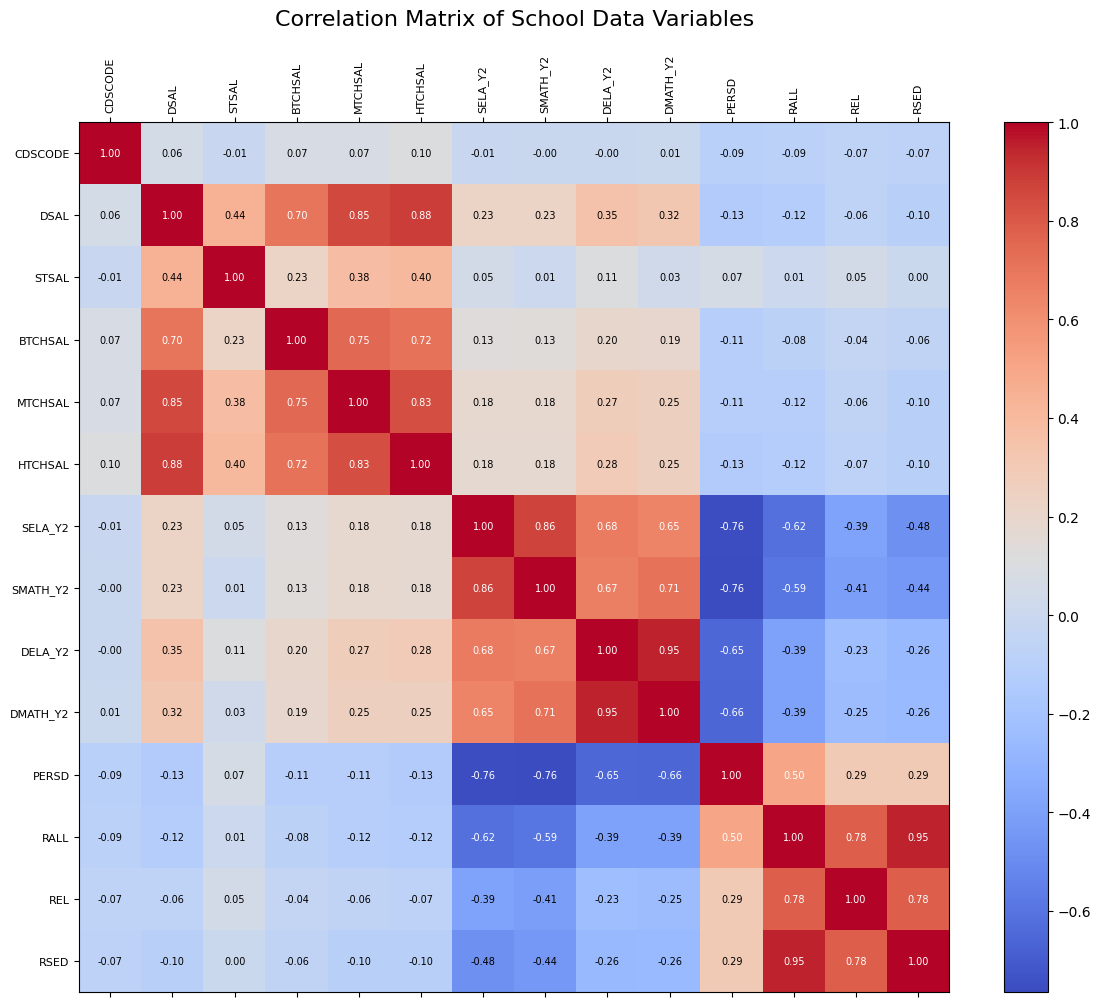

In [47]:
# Display correlation matrix
corr = merged.corr()
display(corr)

# Enhanced correlation matrix visualization
fig, ax = plt.subplots(figsize=(12, 10))
heatmap = ax.matshow(corr, cmap=plt.cm.coolwarm)
ax.set_title("Correlation Matrix of School Data Variables", fontsize=16, pad=20)
plt.colorbar(heatmap, ax=ax)
labels = corr.columns
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90, fontsize=8)
ax.set_yticklabels(labels, fontsize=8)
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        ax.text(i, j, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", color="white" if abs(corr.iloc[i, j]) > 0.5 else "black", fontsize=7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "correlation_matrix.png"))
plt.show()

## Key Relationships: Visualizations

Explore and visualize the relationships between key variables, as in the automated report.

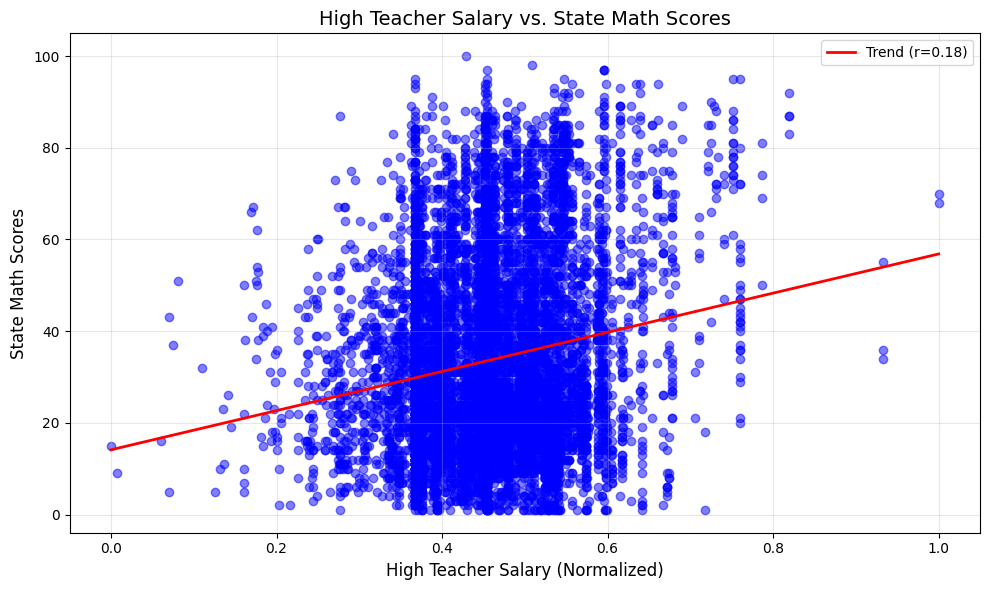

In [48]:
# High Teacher Salary vs. State Math Scores
plt.figure(figsize=(10, 6))
plt.scatter(merged['HTCHSAL'], merged['SMATH_Y2'], alpha=0.5, c='blue')
z = np.polyfit(merged['HTCHSAL'], merged['SMATH_Y2'], 1)
p = np.poly1d(z)
plt.plot(np.linspace(0, 1, 100), p(np.linspace(0, 1, 100)), "r-", linewidth=2, label=f'Trend (r={merged["HTCHSAL"].corr(merged["SMATH_Y2"]):.2f})')
plt.title('High Teacher Salary vs. State Math Scores', fontsize=14)
plt.xlabel('High Teacher Salary (Normalized)', fontsize=12)
plt.ylabel('State Math Scores', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "teacher_salary_vs_math.png"))
plt.show()

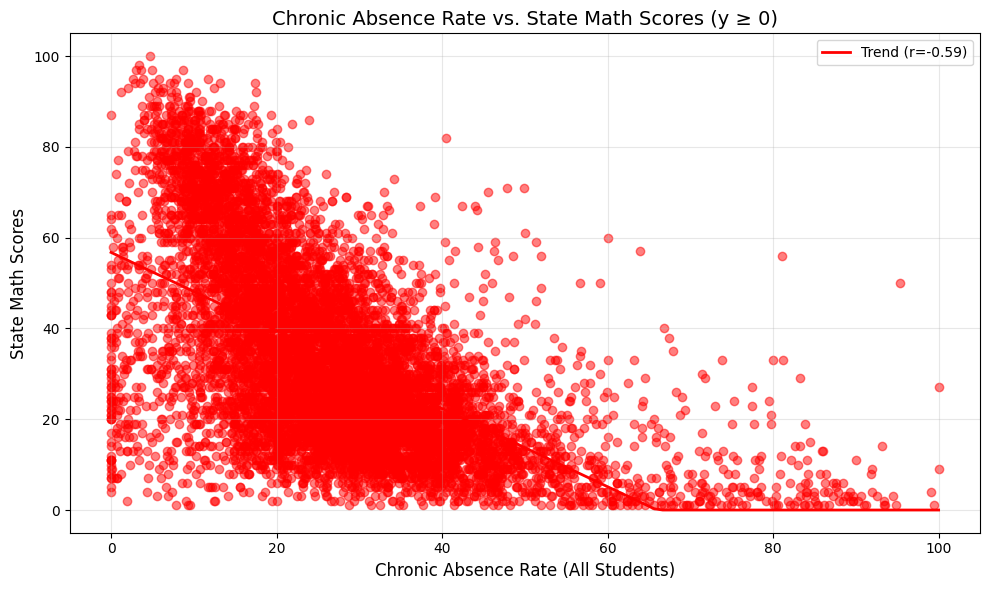

In [49]:
# Chronic Absence Rate vs. State Math Scores (with y >= 0 constraint and no negative values in trend line)
plt.figure(figsize=(10, 6))
# Only plot points where State Math Scores are >= 0
mask = merged['SMATH_Y2'] >= 0
x = merged.loc[mask, 'RALL']
y = merged.loc[mask, 'SMATH_Y2']
plt.scatter(x, y, alpha=0.5, c='red')
# Only fit trend line if there are enough points
if len(x) > 1:
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = p(x_line)
    y_line[y_line < 0] = 0  # Clamp trend line to y >= 0
    plt.plot(x_line, y_line, "r-", linewidth=2, label=f'Trend (r={x.corr(y):.2f})')
plt.title('Chronic Absence Rate vs. State Math Scores (y ≥ 0)', fontsize=14)
plt.xlabel('Chronic Absence Rate (All Students)', fontsize=12)
plt.ylabel('State Math Scores', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "absence_vs_math.png"))
plt.show()

## Key Findings

1. **Socioeconomic Status Impact**
   
   Schools with higher percentages of socioeconomically disadvantaged students show significantly lower test scores in both Math and English Language Arts. The correlation values range from -0.76 to -0.84.

2. **Teacher Salary Relationship**
   
   Higher teacher compensation appears to be associated with slightly better academic outcomes, though the relationship is not strong. This may suggest that while pay contributes to performance, other factors—like absenteeism or socioeconomic status—have greater influence.

3. **Chronic Absence Impact**
   
   Higher chronic absence rates strongly correlate with lower test scores. The correlation values range from -0.39 to -0.48, indicating that regular attendance is an important factor in student achievement.

4. **English Learner Absence & Disadvantage**
   
   Chronic absence rates among English Learners are moderately correlated with both the percentage of socioeconomically disadvantaged students (r ≈ 0.29) and lower test scores (r ≈ -0.39 for ELA, r ≈ -0.41 for Math). This suggests that schools with more disadvantaged students and higher English Learner absence face compounding challenges in academic achievement.

5. **Absence Rate Patterns**
   
   Absence rates strongly correlate across different student groups (0.76-0.95), suggesting that absence issues tend to affect entire school populations rather than being isolated to specific demographic groups.